In [2]:
!pip install pandas sentence-transformers umap-learn matplotlib seaborn

   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   -- ------------------------------------- 14.4/216.1 MB 64.6 MB/s eta 0:00:04
   ----- ---------------------------------- 28.3/216.1 MB 66.5 MB/s eta 0:00:03
   ------ --------------------------------- 37.7/216.1 MB 60.0 MB/s eta 0:00:03
   --------- ------------------------------ 49.3/216.1 MB 58.1 MB/s eta 0:00:03
   ------------ --------------------------- 65.3/216.1 MB 62.1 MB/s eta 0:00:03
   --------------- ------------------------ 81.5/216.1 MB 65.9 MB/s eta 0:00:03
   ----------------- ---------------------- 97.0/216.1 MB 65.2 MB/s eta 0:00:02
   ------------------- ------------------- 109.6/216.1 MB 64.8 MB/s eta 0:00:02
   ---------------------- ---------------- 125.3/216.1 MB 65.1 MB/s eta 0:00:02
   ------------------------ -------------- 136.3/216.1 MB 64.0 MB/s eta 0:00:02
   -------------------------- ------------ 147.8/216.1 MB 63.4 MB/s eta 0:00:02
   ---------------------------- ---------- 158.9/

In [9]:
import pandas as pd

# Load the CSV with annotated headlines
df = pd.read_csv("news_conflict_progress.csv")

# Keep only rows where sentiment_score is not missing
df = df[df['sentiment_score'].notna()]

# Optional: display how many headlines are annotated
print(f"{len(df)} headlines loaded with sentiment scores.")
df.head()


3347 headlines loaded with sentiment scores.


,media_name,id,indexed_date,language,media_url,publish_date,title,url,date,sentiment_score
1,cbsnews.com,f806b4411374d2927e1daf1f2e4313a11d2e7c09dadd9c...,2024-02-19T03:10:20Z,en,cbsnews.com,2023-10-15,Threats in U.S. rising after Hamas attack on I...,https://www.cbsnews.com/news/threats-in-u-s-ri...,2023-10-15,8.0
2,cbsnews.com,8a3d30f74219abc7cfc10f7705119525b521e998ea7284...,2024-06-08T15:29:04Z,en,cbsnews.com,2024-06-08,"Israel says 4 hostages, including Noa Argamani...",https://www.cbsnews.com/losangeles/news/israel...,2024-06-08,7.0
3,cbsnews.com,7029b3a0d65d88e3c27777eb2be6edd86a9fe260a117b9...,2024-02-18T15:05:51Z,en,cbsnews.com,2023-10-23,Dueling rallies for Israel and Palestine held ...,https://www.cbsnews.com/chicago/news/dueling-r...,2023-10-23,5.0
4,cbsnews.com,066fd110c93de6b0d3383d930479255211ccafa09b4b56...,2024-05-02T19:20:09Z,en,cbsnews.com,2024-05-02,Israel's Netanyahu is determined to launch a g...,https://www.cbsnews.com/news/israel-hamas-war-...,2024-05-02,8.0
5,cbsnews.com,2fb62b7481a0ccd8ee242cf94df2a0967a17bab9287941...,2024-07-31T18:28:30Z,en,cbsnews.com,2024-07-31,Hezbollah commander behind Golan Heights attac...,https://www.cbsnews.com/chicago/video/hezbolla...,2024-07-31,8.0


Generate sentence embeddings using Sentence-BERT

In [10]:
from sentence_transformers import SentenceTransformer

# Load a compact and fast pre-trained model suitable for short texts like headlines
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert the headlines to a list
titles = df['title'].tolist()

# Generate embeddings with progress bar
embeddings = model.encode(titles, show_progress_bar=True)


Batches:   0%|          | 0/105 [00:00<?, ?it/s]

Reduce dimensions to 2D using UMAP

In [11]:
import umap

# Initialize UMAP model for dimensionality reduction
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)

# Apply UMAP to the embeddings
reduced = umap_model.fit_transform(embeddings)

# Add UMAP results to the dataframe
df['umap_x'] = reduced[:, 0]
df['umap_y'] = reduced[:, 1]


c:\Users\laura\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Visualize with color by media_name

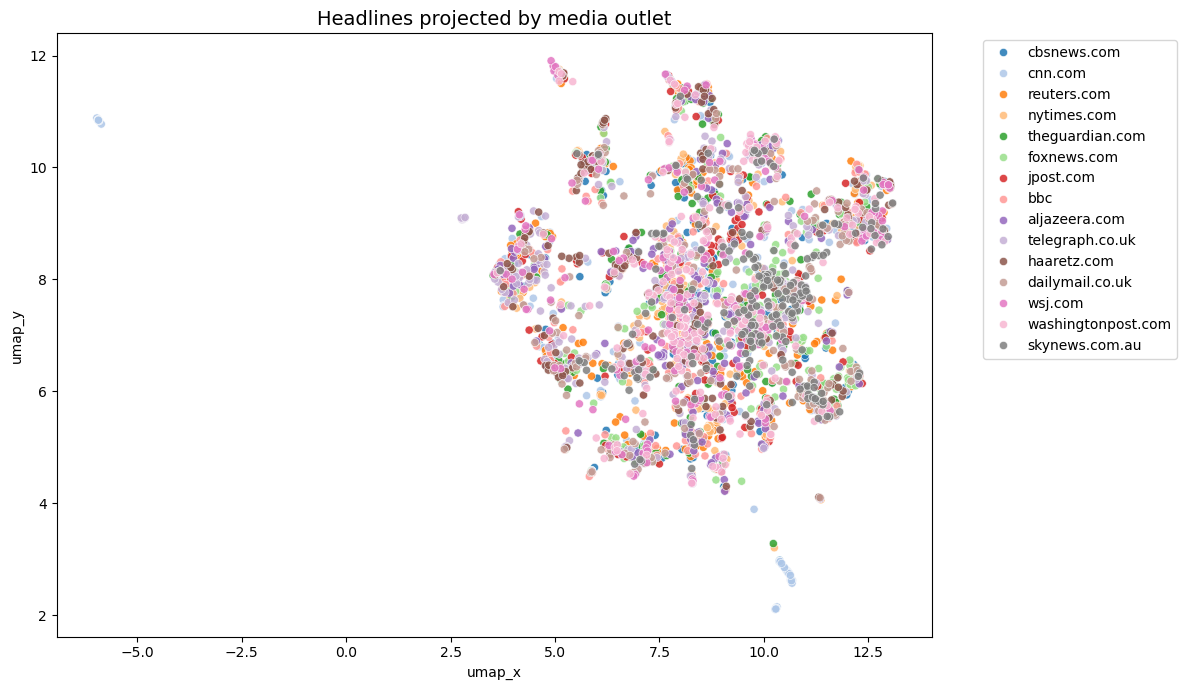

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='umap_x', y='umap_y',
    hue='media_name',
    palette='tab20',
    s=35, alpha=0.85
)
plt.title("Headlines projected by media outlet", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Visualize with color by sentiment_score (hawkish–dovish)

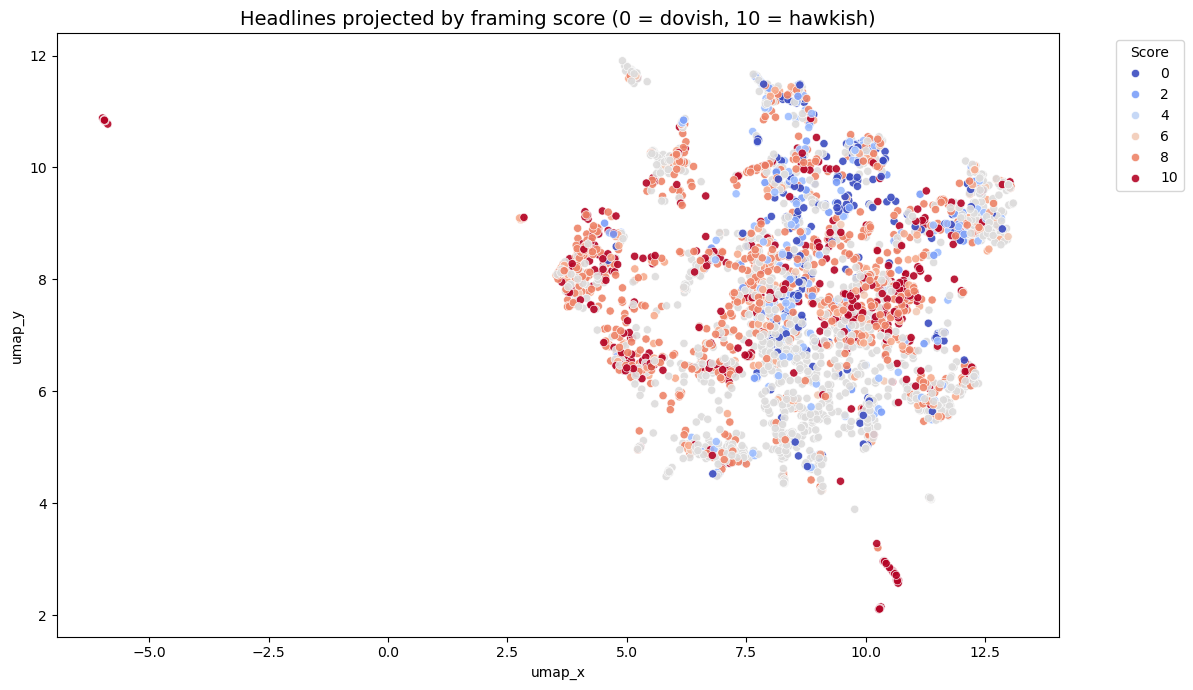

In [13]:
# Convert sentiment_score to numeric (in case it's still string)
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='umap_x', y='umap_y',
    hue='sentiment_score',
    palette='coolwarm',
    s=35, alpha=0.9
)
plt.title("Headlines projected by framing score (0 = dovish, 10 = hawkish)", fontsize=14)
plt.legend(title='Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df_export = df[['title', 'umap_x', 'umap_y', 'sentiment_score']].copy()

# Export to CSV
df_export.to_csv("umap_with_sentiment.csv", index=False)

In [ ]:
# Version with media_name
df_export = df[['title', 'umap_x', 'umap_y', 'sentiment_score', 'media_name']].copy()

# Export to CSV
df_export.to_csv("umap_with_sentiment_and_media.csv", index=False)
